In [77]:
import numpy as np
import matplotlib.pyplot as plt


def check(x, a, exp=np.logspace(-15, 1, num=50), e=1e-16):
    #Define some functions below for checking the optimal error.
    def d(function, x, dx):
        """
        Definiton of our derivative
            -Inputs: function (function) function to be differentiated
                     x (float) value at which we take the derivative   
                     dx (float) step size
            -Outputs: fp (float) first derivative of function at x
        """
        fp = (8*(function(x+dx)-function(x-dx))-(function(x+2.0*dx)-function(x-2.0*dx)))/(12*dx)
        return fp
    def optimalD(function, function_d5, x, e=e):
        """
        Optimal dx derived in the PDF attached in this folder
        """
        dx = (45.0*function(x)*e/(4.0*function_d5(x)))**0.2
        return dx

    def exponential(x, a=a):
        """
        The np.exp function with a multiplying the x in the exponent
        """
        return np.exp(a*x)

    def exponentialdiff(x, a=a, n=5):
        """
        I define the Nth derivative of exp(a*x). Althought this will probably be used 
        only for the 5th derivative. n is the order to be differentiated at. Default set
        to 5.
        """
        return a**n*np.exp(a*x)

    d_true = exponentialdiff(x, n=1)
    d_exp = d(exponential, x, exp)
    err = np.abs(d_exp - d_true)
    dx_predicted = optimalD(exponential, exponentialdiff, x)

    #Printing some stuff
    print("Derivative of exp({}*x) at x= {}".format(a, x))
    print("=> Predicted delta:", dx_predicted)
    print("=> dx yielding a minimal error:", exp[np.argmin(err)])
    
    #Plotting some results
    fig,ax = plt.subplots(1,1,gridspec_kw={'height_ratios':[1]},figsize=(10,6))
    ax.plot(exp, err, 'k.', label=r"Theoretical error")
    ax.axvline(dx_predicted, linestyle='--', color ='red',label=r"Predicted $\delta$")
    ax.axvline(exp[np.argmin(err)],linestyle='--',color='orange', label=r'Found $\delta$')
    ax.tick_params(labelsize=15)
    ax.set_xlabel(r"$\delta x$", fontsize=15)
    ax.set_ylabel("Error", fontsize=15)
    plt.yscale("log")
    plt.xscale("log")
    plt.legend()
    plt.show()

Derivative of exp(1.0*x) at x= 0.0
=> Predicted delta: 0.0010238362555396092
=> dx yielding a minimal error: 0.0005689866029018281


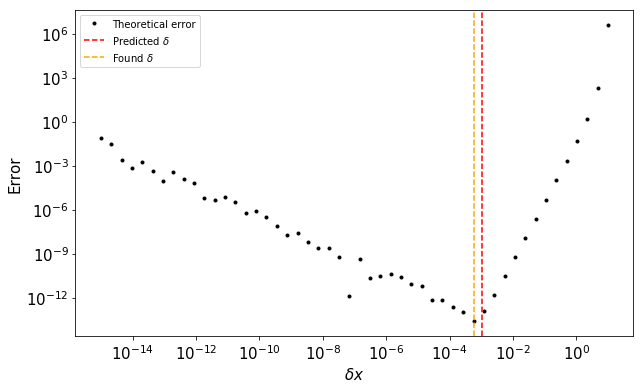

Derivative of exp(0.001*x) at x= 0.0
=> Predicted delta: 1.0238362555396097
=> dx yielding a minimal error: 1.0481131341546832


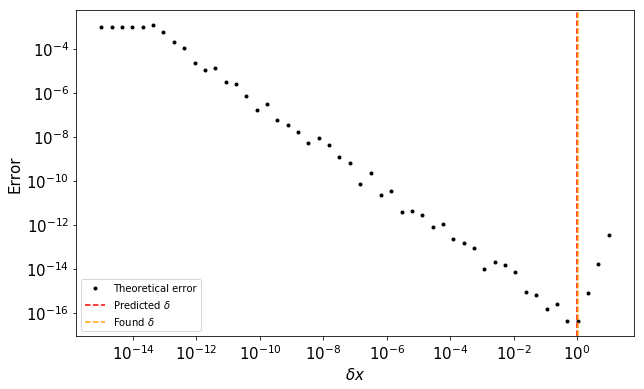

In [78]:
check(0.0, 1.0)
check(0.0, 0.001)

In [ ]:
#Testing at x=0, both exp(0.001x) and exp(x) seemed to agree with the derived expression with some discrepancy of about
#a factor of 2. 